<a href="https://colab.research.google.com/github/Anup191495/Anup12year/blob/main/Pro_135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving final_data.csv to final_data.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius
0,0,Sun,0.000015813,1,1
1,1,Sirius,0008.6,2.1,1.71´
2,2,Canopus,0310,15,71
3,3,Alpha Centauri,0004.4,1.1,1.2
4,4,Arcturus,0037,1.1,26


In [ ]:
df.columns

Index(['Unnamed: 0', 'Star_name', 'Distance', 'Mass', 'Radius'], dtype='object')

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

,Star_name,Distance,Mass,Radius
0,Sun,0.000015813,1.0,1
1,Sirius,8.6,2.1,1.71
2,Canopus,310,15.0,71
3,Alpha Centauri,4.4,1.1,1.2
4,Arcturus,37,1.1,26


In [ ]:
df.dtypes

Star_name     object
Distance      object
Mass         float64
Radius        object
dtype: object

In [ ]:
df['Radius']=df['Radius'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [ ]:
radius = df['Radius'].to_list()
mass = df['Mass'].to_list()
gravity =[]

#converting solar mass and radius into km & kg
def convert_to_si(radius,mass):
    for i in range(0,len(radius)-1):
        radius[i] = radius[i]*6.957e+8
        mass[i] = mass[i]*1.989e+30

convert_to_si(radius,mass)


In [ ]:
def gravity_calculation(radius,mass):
    G = 6.674e-11
    for index in range(0,len(mass)):
        g= (mass[index]*G)/((radius[index])**2)
        gravity.append(g)

gravity_calculation(radius,mass)

df["Gravity"] = gravity
df

,Star_name,Distance,Mass,Radius,Gravity
0,Sun,0.000016,1.000000,1.000000,2.742692e+02
1,Sirius,8.600000,2.100000,1.710000,1.969718e+02
2,Canopus,310.000000,15.000000,71.000000,8.161153e-01
3,Alpha Centauri,4.400000,1.100000,1.200000,2.095112e+02
4,Arcturus,37.000000,1.100000,26.000000,4.462960e-01
...,...,...,...,...,...
248,2MASSI J2356547-155310,74.000000,0.076367,0.112012,1.669385e+03
249,WISE 0410+1502,20.000000,0.005728,0.120233,1.086673e+02
250,WISE 0458+6434A,35.900000,0.014319,0.431605,2.108201e+01
251,WISE 0458+6434B,35.900000,0.009546,0.390499,1.716928e+01


In [ ]:
#df['Distance']=df['Distance'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
df.to_csv("star_with_gravity.csv")

In [ ]:
df.dtypes

Star_name     object
Distance     float64
Mass         float64
Radius       float64
Gravity      float64
dtype: object

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving star_with_gravity.csv to star_with_gravity.csv


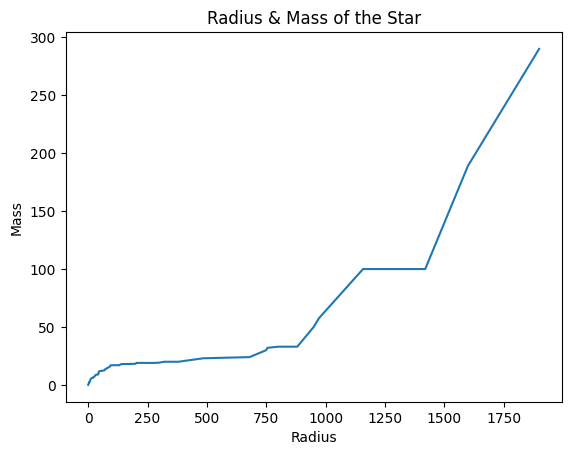

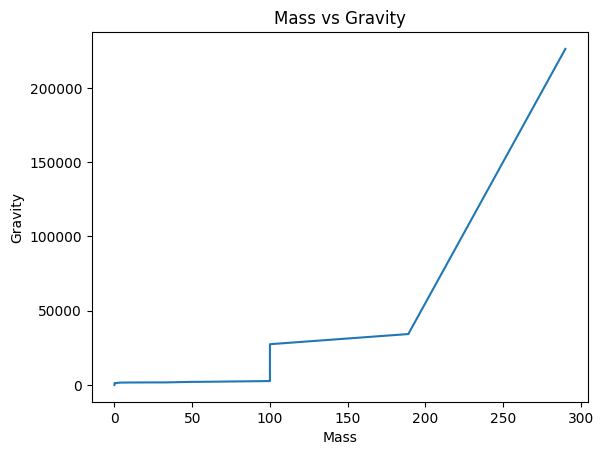

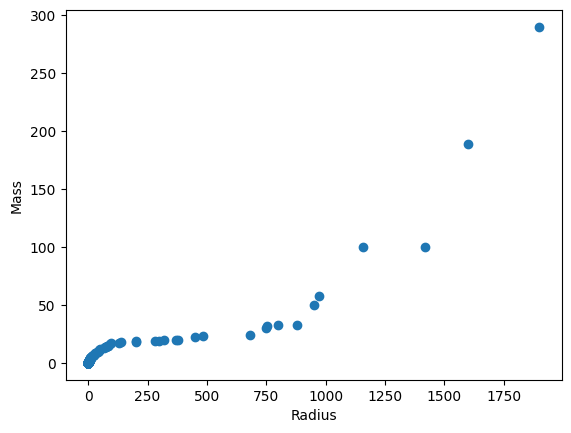

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("star_with_gravity.csv")

df.head()

mass = df["Mass"].to_list()
radius = df["Radius"].to_list()
dist = df["Distance"].to_list()
gravity = df["Gravity"].to_list()

mass.sort()
radius.sort()
gravity.sort()
plt.plot(radius,mass)

plt.title("Radius & Mass of the Star")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

plt.plot(mass,gravity)

plt.title("Mass vs Gravity")
plt.xlabel("Mass")
plt.ylabel("Gravity")
plt.show()

plt.scatter(radius,mass)
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

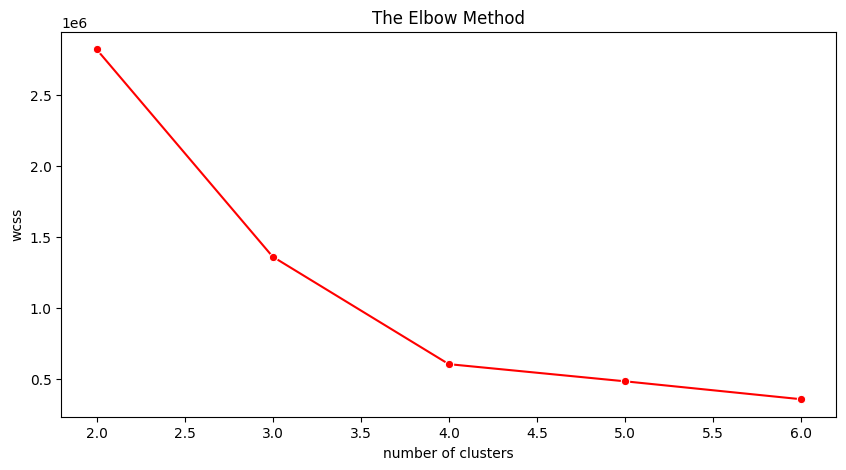

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = df[['Mass', 'Radius']]
masses = df['Mass']
radiuses = df['Radius']

X = []
for index, masses in enumerate(masses):
    temp_list = [radiuses[index], masses]
    X.append(temp_list)

wcss = []
for i in range(2,7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 44)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,5))
sns.lineplot(x = range(2,7), y= wcss, marker = 'o', color = 'red')
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
import pandas as pd

def safe_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None


df['Distance'] = df['Distance'].apply(safe_float)

filtered_df = df[df['Distance'] <= 100]

filtered_df.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius
0,0,Sun,0.000016,1,1
1,1,Sirius,8.600000,2.1,1.71´
3,3,Alpha Centauri,4.400000,1.1,1.2
4,4,Arcturus,37.000000,1.1,26
5,5,Vega,25.000000,2.2,2.7


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving cv.csv to cv (1).csv


['Sun', '1', '1', 1.5813e-05]


TypeError: ignored

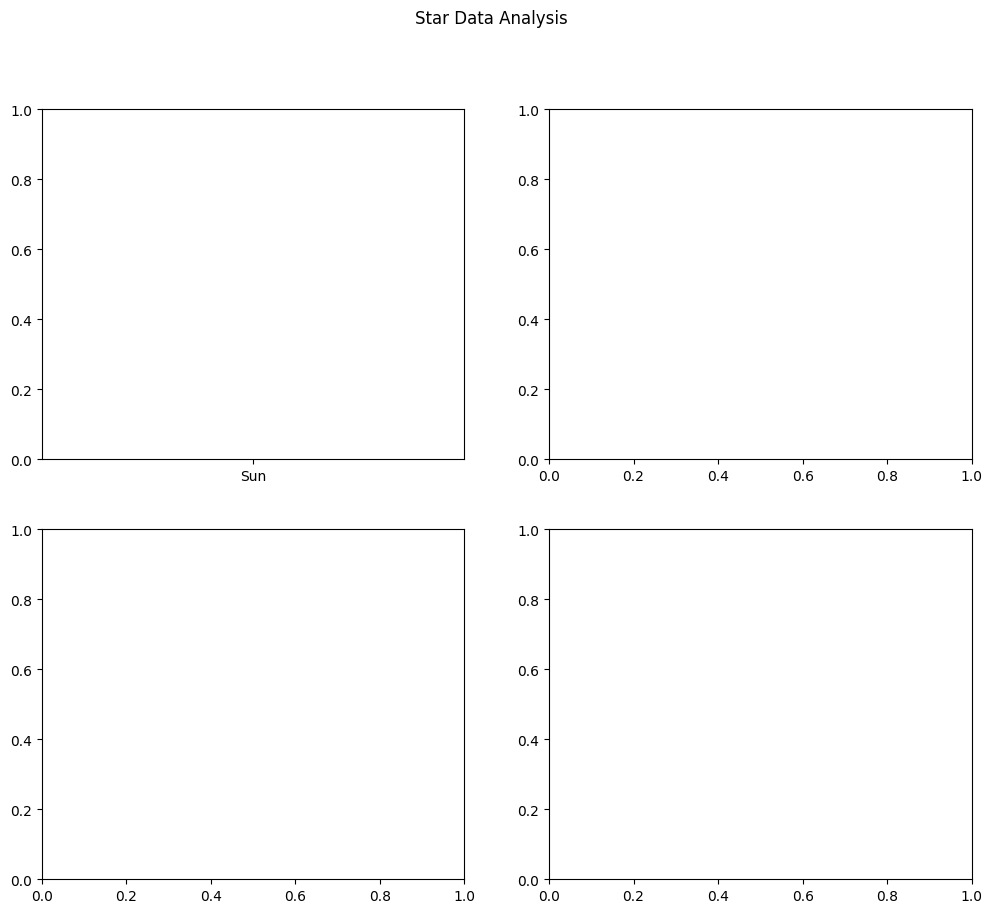

In [ ]:
star_data = df[['Star_name', 'Mass', 'Radius', 'Distance']].values.tolist()
print(star_data[0])

second_star_name = star_data[1][0]

TypeError: ignored

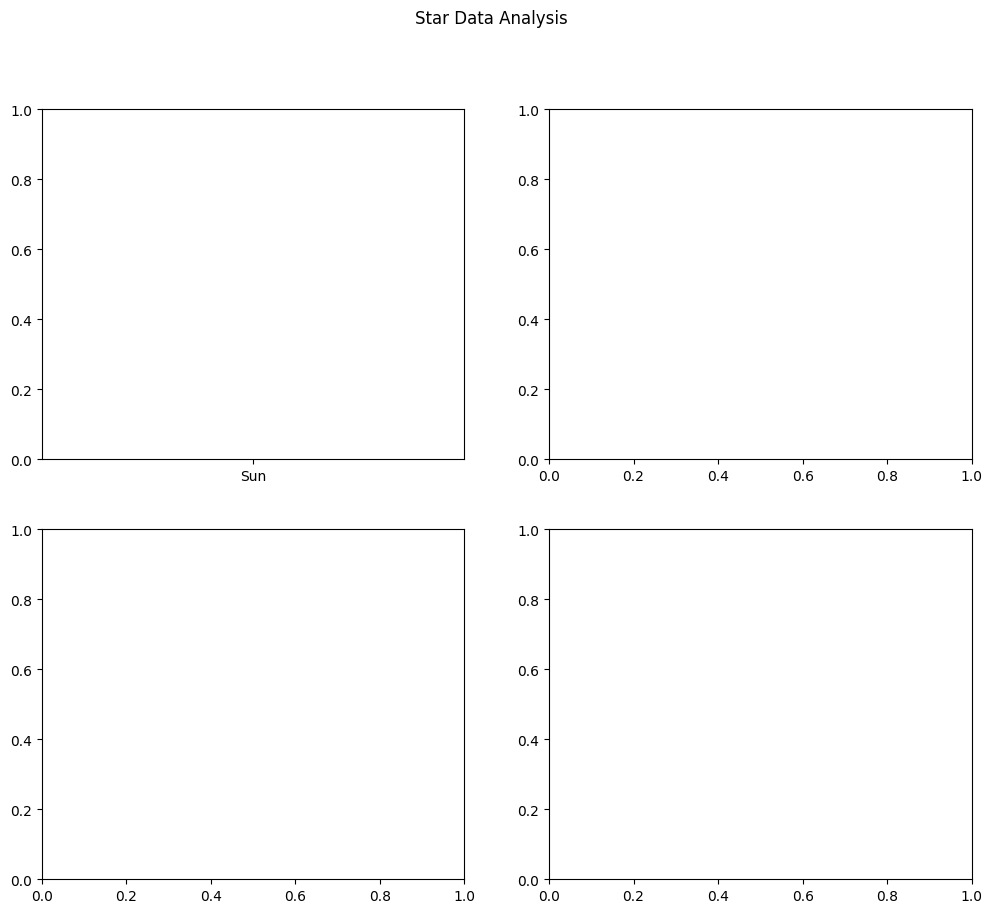

In [5]:
import matplotlib.pyplot as plt

# Remove leading and trailing whitespace from 'Star_name' and convert it to strings
df['Star_name'] = df['Star_name'].str.strip().astype(str)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Star Data Analysis')

# Bar chart: Star name vs Mass
axes[0, 0].bar(df['Star_name'], df['Mass'])
axes[0, 0].set_title('Star name vs Mass')
axes[0, 0].set_xticklabels(df['Star_name'], rotation=90)
axes[0, 0].set_ylabel('Mass')

# Bar chart: Star name vs Radius
axes[0, 1].bar(df['Star_name'], df['Radius'])
axes[0, 1].set_title('Star name vs Radius')
axes[0, 1].set_xticklabels(df['Star_name'], rotation=90)
axes[0, 1].set_ylabel('Radius')

# Bar chart: Star name vs Distance
axes[1, 0].bar(df['Star_name'], df['Distance'])
axes[1, 0].set_title('Star name vs Distance')
axes[1, 0].set_xticklabels(df['Star_name'], rotation=90)
axes[1, 0].set_ylabel('Distance')

# Bar chart: Star name vs Gravity
axes[1, 1].bar(df['Star_name'], df['Gravity'])
axes[1, 1].set_title('Star name vs Gravity')
axes[1, 1].set_xticklabels(df['Star_name'], rotation=90)
axes[1, 1].set_ylabel('Gravity')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


In [6]:
from google.colab import files
data_to_load = files.upload()

Saving cv.csv to cv.csv


TypeError: ignored

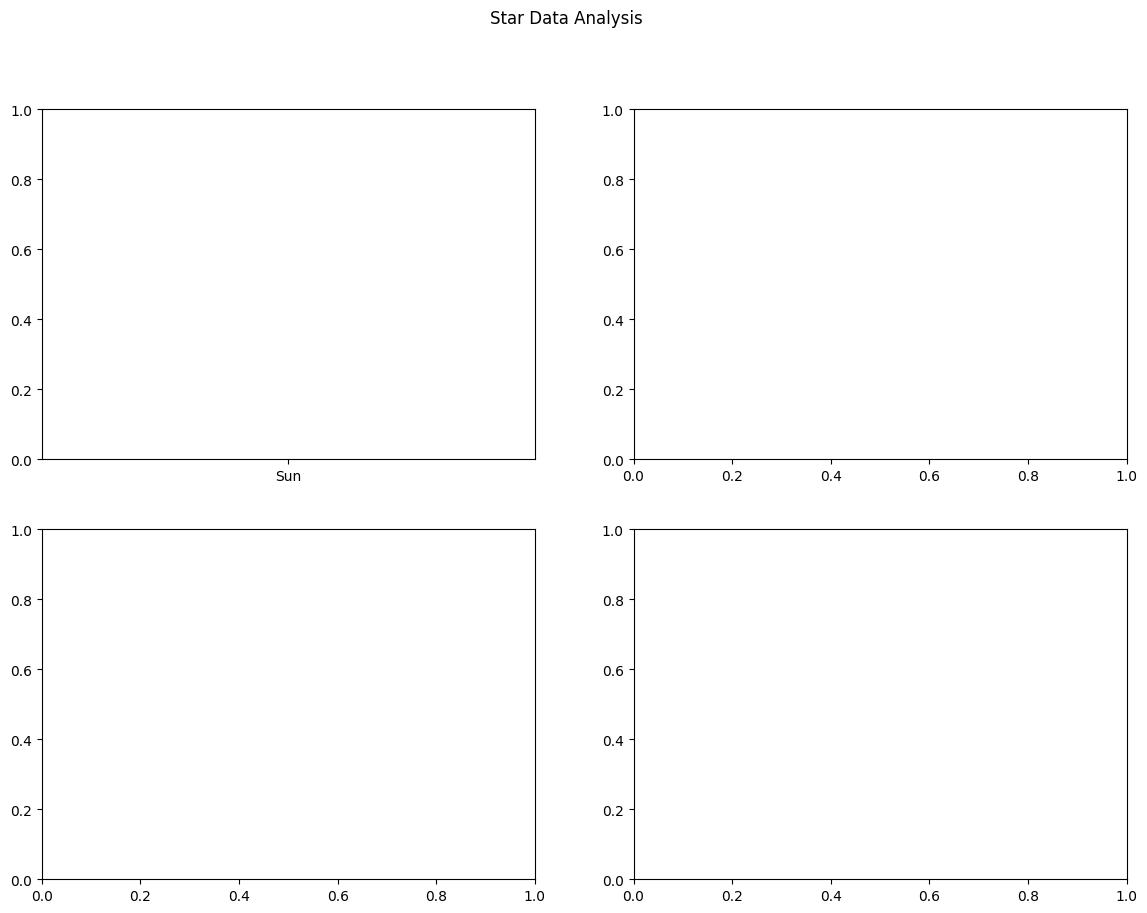

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Read the CSV file created in Project 134
df = pd.read_csv("cv.csv")

# Step 3: Create a list of star data
star_data = df[['Star_name', 'Mass', 'Radius', 'Distance']]

# Step 4: Plot bar charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Star Data Analysis')

# Bar chart: Star name vs Mass
axes[0, 0].bar(star_data['Star_name'], star_data['Mass'])
axes[0, 0].set_title('Star name vs Mass')
axes[0, 0].set_xticklabels(star_data['Star_name'], rotation=90)
axes[0, 0].set_ylabel('Mass (Solar Mass)')

# Bar chart: Star name vs Radius
axes[0, 1].bar(star_data['Star_name'], star_data['Radius'])
axes[0, 1].set_title('Star name vs Radius')
axes[0, 1].set_xticklabels(star_data['Star_name'], rotation=90)
axes[0, 1].set_ylabel('Radius (Solar Radius)')

# Bar chart: Star name vs Distance
axes[1, 0].bar(star_data['Star_name'], star_data['Distance'])
axes[1, 0].set_title('Star name vs Distance')
axes[1, 0].set_xticklabels(star_data['Star_name'], rotation=90)
axes[1, 0].set_ylabel('Distance (Light Years)')

# Bar chart: Star name vs Gravity
axes[1, 1].bar(star_data['Star_name'], star_data['Gravity'])
axes[1, 1].set_title('Star name vs Gravity')
axes[1, 1].set_xticklabels(star_data['Star_name'], rotation=90)
axes[1, 1].set_ylabel('Gravity (m/s^2)')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Step 5: Interpret the plots
plt.show()
